# 1. Import necessary packages
For this exercise we need

pandas
train_test_split
LogisticRegression
pyplot from matplotlib


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [58]:
df_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/parkinsons.data')
                 

In [59]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# 2. Load and prepare the dataset
Load the dataset into a dataframe named df_data.
Drop the name column. This column is not a feature required by the model.
Create a dataframe named X containing all the columns except the status.
Create a dataframe named y containing the status.

In [60]:
df_data.drop('name', axis=1, inplace = True)

In [61]:
X = df_data.drop('status', axis=1)


y = df_data['status']



# 3. Split the dataset into a training set and a test set

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Create the model
Instantiate a Logistic Regression classifier with a lbfgs solver and penalty set to 'none'.
Fit the classifier to the data.
If the algorithm fails to converge, what change can you make to fix that?


In [63]:

logit = LogisticRegression(penalty='none', solver='lbfgs', max_iter=1000)
logit.fit(X_train, y_train)

    

/Users/robholmstrom/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000, penalty='none')

# 5. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

In [64]:
logit_score = logit.score(X_test, y_test)
logit_score

0.8979591836734694

# 6. L2 Regularization
Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

In [67]:
logit = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
logit.fit(X_train, y_train)
logit_score = logit.score(X_test, y_test)
logit_score

0.8775510204081632

# 7. Choose the C parameter
Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.5. Plot a graph to show the accuracy on the test data versus the accuracy on the training data. Select an appropriate value for C and explain why that may be the best value.

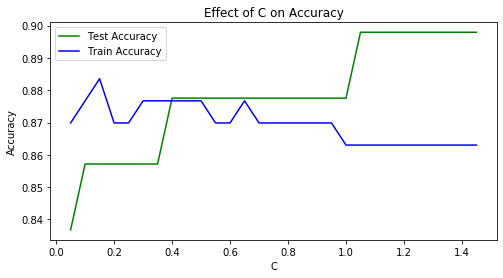

In [68]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    logit = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
    logit.fit(X_train, y_train)
    test_accuracy.append(logit.score(X_test, y_test))
    train_accuracy.append(logit.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [37]:
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from scipy import stats

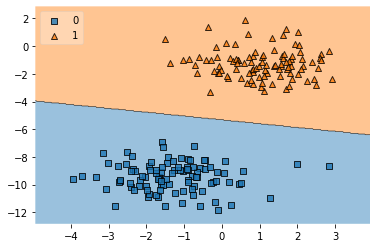

In [38]:
Xb, yb = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=1.0, random_state=2)

lr = LogisticRegression(solver='lbfgs', random_state=2)
lr.fit(Xb, yb)

plot_decision_regions(Xb, yb, clf=lr, legend=2)
plt.show()

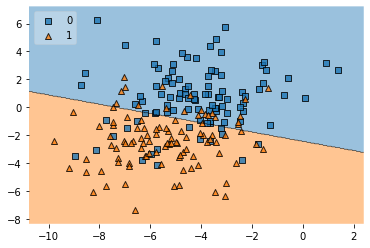

In [39]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=2.0, random_state = 225)

lr = LogisticRegression(solver='lbfgs', random_state=4)
lr.fit(X, y)

plot_decision_regions(X, y, clf=lr, legend=2)
plt.show()